<hr style="height:10px"> 
 
<div class='container2'>
		<div>
			<img src='https://3.bp.blogspot.com/-n_z36Em56RY/U9pwRro1MwI/AAAAAAABNas/B3G7ht0PZvc/s1600/IMAGEM-PATO+ENGRAVATADO-AZULeditededited1.jpg' ALIGN='left' style='width:10em'>
		</div>	
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2023/1 | 46M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial</b></div>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Aula 5 - Preparação e Análise de Dados</h2>

Notebook desenvolvido por: <a href="http://lattes.cnpq.br/1346824250595330">Prof. Dr. Adriano C. Santana</a>
<br>Modificado por: Gustavo Mota Barros

 <hr style="height:2px"> 


In [1]:
# Confirmar a versão da Linguagem Python instalada
from platform import python_version
print(f'A versão da linguagem Python usada neste projeto é a {python_version()}!')

A versão da linguagem Python usada neste projeto é a 3.10.9!


In [2]:
# Verificar se o Python está funcionando
print('Bye bye, World!')

Bye bye, World!


---
## 1. Bibliotecas Necessárias para o Notebook (Aula)

Para este notebook, deve ser utilizada a mesma versão apresentada pelo professor da disciplina.

* [`matplotlib`](https://matplotlib.org/): construção e exibição de gráficos genéricos.
* [`seaborn`](https://seaborn.pydata.org/): construção e exibição de gráficos específicos/estatísticas.
* [`numpy`](https://numpy.org): manipulação de dados em formato de vetores e matrizes.
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html): manipulação de dados em formato de tabelas.

---
## 2. Carregar e Exibir os Dados da Fonte

Primeiro, vamos importar todas as bibliotecas que serão utilizadas no projeto.

In [3]:
# importar a biblioteca - Todos os projetos passarão pelo Numpy!
import numpy as np

# importar a biblioteca - Excel do Python!
import pandas as pd 

# importar as bibliotecas - Visualizar dados!
import seaborn as sns
import matplotlib.pyplot as plt

print('Bibliotecas carregadas com sucesso!')

# Instalação silenciosa
#!pip install -q numpy

Bibliotecas carregadas com sucesso!


---
## 3. Introdução ao Dados

A cada dia, uma enorme quantidade de dados é gerada de diferentes fontes. Um conjunto de dados é formado por objetos que representam algo físico (cadeira) ou abstrato (diagnóstico), sendo descrito por seus atributos. Deve-se realizar a caracterização dos dados e a exploração inicial com estatística e visualização básicas, conhecido como pré-processamento.

O pré-processamento pode demandar tarefas de integração, eliminação manual, amostragem, balanceamento, limpeza, redução da dimensionalidade, transformação de dados etc., estando essas tarefas associadas à Mineração de Dados (MD), a qual foca no processo em si, em como realizar essas tarefas.

A MD busca extrair conhecimento novo, útil e relevante, gerando as bases para a Ciência de Dados (CD), a qual foca no impacto e na relevância do conhecimento.

#### Em resumo, MD (processo) e CD (dados)!

---
## Caracterização de dados

Considere o conjunto de dados provenientes de pacientes de um hospital, denominado `hospital`.

In [5]:
# importar o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv ( 'arquivos/hospital.txt', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


In [6]:
# exibir uma amostra do dataframe
display(df_dataset.head())

,Id,Nome,Idade,Sexo,Peso,Manchas,Temp,Internação,Estado,Time,Diagnóstico
0,4201,João,55,M,90.0,Concentradas,38.0,2,SP,Palmeiras,Doente
1,3217,Maria,56,F,91.0,Inexistentes,39.5,4,MG,Cruzeiro,Doente
2,4039,Luiz,49,M,92.0,Espalhadas,38.0,2,RS,Grêmio,Saudável
3,1920,José,57,M,93.0,Inexistentes,38.5,2,MG,Atlético,Doente
4,4340,Cláudia,21,F,52.0,Uniformes,37.6,1,PE,Sport,Saudável


In [7]:
# exibir todo dataframe
display(df_dataset.head(n=8))

,Id,Nome,Idade,Sexo,Peso,Manchas,Temp,Internação,Estado,Time,Diagnóstico
0,4201,João,55,M,90.0,Concentradas,38.0,2,SP,Palmeiras,Doente
1,3217,Maria,56,F,91.0,Inexistentes,39.5,4,MG,Cruzeiro,Doente
2,4039,Luiz,49,M,92.0,Espalhadas,38.0,2,RS,Grêmio,Saudável
3,1920,José,57,M,93.0,Inexistentes,38.5,2,MG,Atlético,Doente
4,4340,Cláudia,21,F,52.0,Uniformes,37.6,1,PE,Sport,Saudável
5,2301,Ana,58,F,94.0,Inexistentes,38.0,3,RJ,Botafogo,Doente
6,1322,Marta,19,F,87.0,Espalhadas,39.0,3,AM,Flamengo,Doente
7,3027,Paulo,34,M,67.0,Uniformes,38.4,2,GO,Vila Nova,Saudável


Cada objeto corresponde a um paciente, sendo formado pelos atributos de entrada referentes ao paciente. 

Os atributos (identificação; nome; idade; sexo; peso; internação; estado; time; sintomas e resultados clínicos. Os sintomas são (manchas; e temperatura). O atributo alvo: `diagnóstico`. *Esse atributo alvo é necessário em tarefas preditivas. Em tarefas descritivas é desnecessário!*

<Axes: ylabel='Internação'>

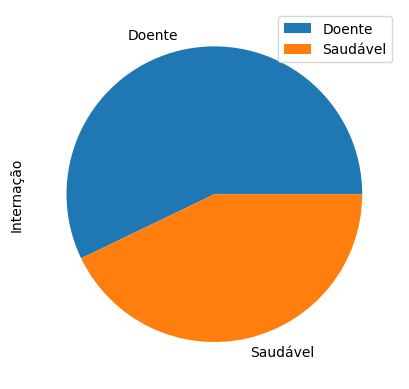

In [8]:
df_dataset.groupby('Diagnóstico').count().plot.pie(y = 'Internação')

---
## Considerações finais:

Antes de aplicar algoritmos de AM a um conjunto de dados, é importante que os dados sejam analisados. Essa análise, que pode ser realizada por técnicas estatísticas e de visualização, permite uma melhor compreensão da distribuição dos dados e pode dar suporte à escolha de formas de abordar o problema.

Foram apresentados conceitos considerados importantes para analisar os principais aspectos de um conjunto de dados. Após uma caracterização dos tipos de dados, foram apresentadas algumas técnicas

## Graficos com matplotlib

Text(0.5, 1.0, 'Numero de interção dos pacientes')

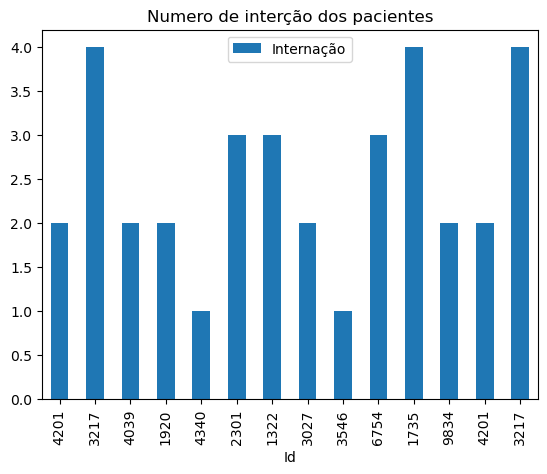

In [12]:
df_dataset.plot.bar(x='Id',y='Internação')
plt.title("Numero de interção dos pacientes")

In [64]:
df_dataset.groupby("Time").describe()

Id                                                         \
          count    mean          std     min      25%     50%      75%   
Time                                                                     
Atlético    1.0  1920.0          NaN  1920.0  1920.00  1920.0  1920.00   
Botafogo    2.0  4527.5  3148.746497  2301.0  3414.25  4527.5  5640.75   
Cruzeiro    2.0  3217.0     0.000000  3217.0  3217.00  3217.0  3217.00   
Flamengo    2.0  1528.5   292.035101  1322.0  1425.25  1528.5  1631.75   
Grêmio      1.0  4039.0          NaN  4039.0  4039.00  4039.0  4039.00   
Palmeiras   2.0  4201.0     0.000000  4201.0  4201.00  4201.0  4201.00   
Sport       2.0  3943.0   561.442784  3546.0  3744.50  3943.0  4141.50   
Vila Nova   2.0  6430.5  4813.275860  3027.0  4728.75  6430.5  8132.25   

                  Idade        ...   Temp       Internação                 \
              max count  mean  ...    75%   max      count mean       std   
Time                           ...                                          
Atlético   1920.0   1.0  57.0  ...  38.50  38.5        1.0  2.0       NaN   
Botafogo   6754.0   2.0  45.5  ...  38.00  38.0        2.0  3.0  0.000000   
Cruzeiro   3217.0   2.0  37.0  ...  39.50  39.5        2.0  4.0  0.000000   
Flamengo   1735.0   2.0  16.0  ...  30.75  39.0        2.0  3.5  0.707107   
Grêmio     4039.0   1.0  49.0  ...  38.00  38.0        1.0  2.0       NaN   
Palmeiras  4201.0   2.0  41.5  ...  38.00  38.0        2.0  2.0  0.000000   
Sport      4340.0   2.0  32.5  ...  37.60  37.6        2.0  1.0  0.000000   
Vila Nova  9834.0   2.0  49.5  ...  38.40  38.4        2.0  2.0  0.000000   

                                      
           min   25%  50%   75%  max  
Time                                  
Atlético   2.0  2.00  2.0  2.00  2.0  
Botafogo   3.0  3.00  3.0  3.00  3.0  
Cruzeiro   4.0  4.00  4.0  4.00  4.0  
Flamengo   3.0  3.25  3.5  3.75  4.0  
Grêmio     2.0  2.00  2.0  2.00  2.0  
Palmeiras  2.0  2.00  2.0  2.00  2.0  
Sport      1.0  1.00  1.0  1.00  1.0  
Vila Nova  2.0  2.00  2.0  2.00  2.0  

[8 rows x 40 columns]

Text(0.5, 1.0, 'Temperatura media dos torcedores')

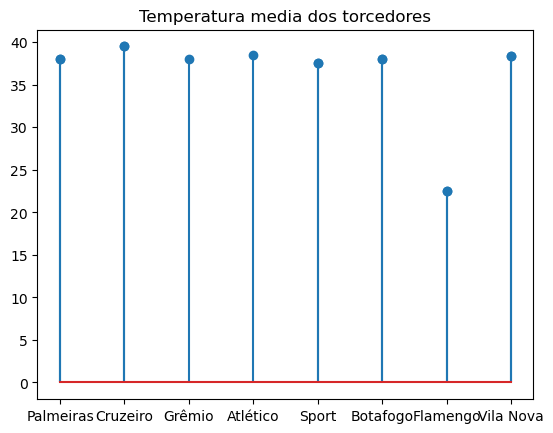

In [81]:
lista_times = []
for i in df_dataset["Time"]:
    lista_times.append(i)
    
lista_temperaturas = []
for i in lista_times:
    lista_temperaturas.append(df_dataset.groupby("Time").get_group(i)["Temp"].mean())
    
##print(df_dataset.groupby("Time").get_group("Flamengo")["Temp"].mean()) 

plt.stem(lista_times, lista_temperaturas)
plt.title('Temperatura media dos torcedores')

## Graficos com Seaborn

Text(0.5, 1.0, 'Manchas x Peso')

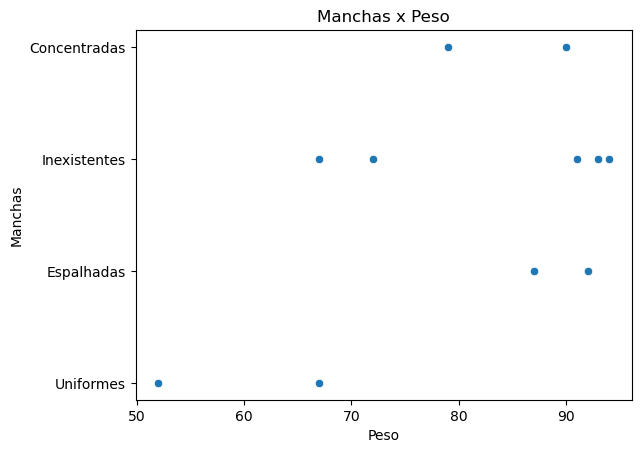

In [84]:
scplot= sns.scatterplot(
        data=df_dataset,
        x="Peso",
        y="Manchas"
        )
scplot.set_title("Manchas x Peso")

Text(0.5, 1.0, 'Internação x Idade')

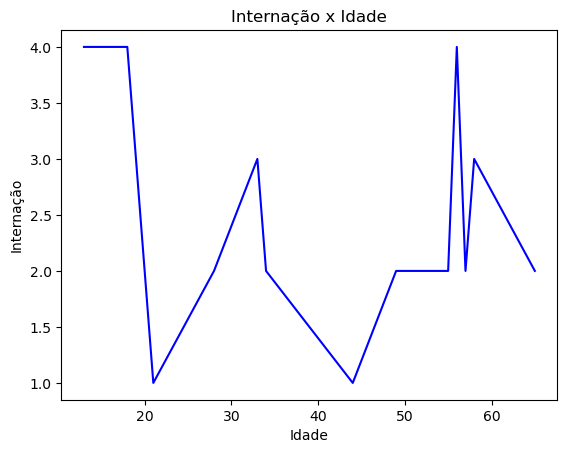

In [85]:
graf = sns.lineplot(data=df_dataset,
                    x="Idade",
                    y="Internação",
                    color="Blue"
                   )
graf.set_title("Internação x Idade")